In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [2]:
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('GDP by County.csv')

In [4]:
states=geopandas.read_file(r'C:\Users\berid\python სავარჯიშოები\geopandas\s_22mr22_states\s_22mr22.shp')
zips=geopandas.read_file(r'C:\Users\berid\python სავარჯიშოები\geopandas\tl_2019_us_zcta510\tl_2019_us_zcta510.shp')

In [5]:
df=df.drop('index',axis=1)
df['Year']=df['Year'].astype(str)
df['County FIPS']=df['County FIPS'].astype(str)

In [6]:
df

,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
0,2001,1001,Southeast,East South Central,Alabama,AL,Autauga,Autauga County,954588000
1,2001,1003,Southeast,East South Central,Alabama,AL,Baldwin,Baldwin County,3929753000
2,2001,1005,Southeast,East South Central,Alabama,AL,Barbour,Barbour County,813278000
3,2001,1007,Southeast,East South Central,Alabama,AL,Bibb,Bibb County,292693000
4,2001,1009,Southeast,East South Central,Alabama,AL,Blount,Blount County,810381000
...,...,...,...,...,...,...,...,...,...
55558,2018,56037,Rocky Mountain,Mountain,Wyoming,WY,Sweetwater,Sweetwater County,3836603000
55559,2018,56039,Rocky Mountain,Mountain,Wyoming,WY,Teton,Teton County,2166420000
55560,2018,56041,Rocky Mountain,Mountain,Wyoming,WY,Uinta,Uinta County,906587000
55561,2018,56043,Rocky Mountain,Mountain,Wyoming,WY,Washakie,Washakie County,358104000


C:\Users\berid\AppData\Local\Temp\ipykernel_10796\1383312226.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped['long']=grouped['geometry'].centroid.x
C:\Users\berid\AppData\Local\Temp\ipykernel_10796\1383312226.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped['lat']=grouped['geometry'].centroid.y


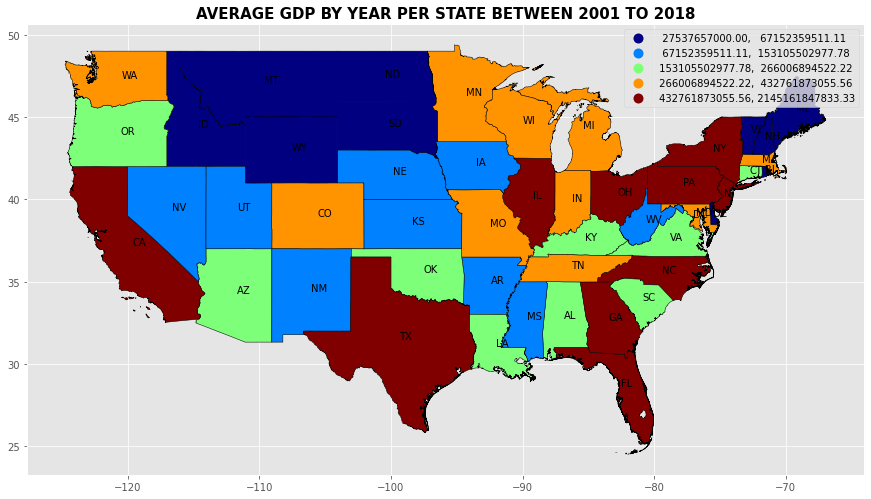

In [7]:
grouped=df.groupby(['Year','STATE_ABBR'])['GDP (Chained $)'].sum().reset_index()\
.groupby('STATE_ABBR')['GDP (Chained $)'].mean().reset_index()
grouped=grouped.merge(states[['STATE','geometry']],left_on='STATE_ABBR',right_on='STATE')
grouped=geopandas.GeoDataFrame(grouped)
grouped['long']=grouped['geometry'].centroid.x
grouped['lat']=grouped['geometry'].centroid.y
grouped=grouped.query('STATE_ABBR not in ["HI","AK"]')

fig,ax=plt.subplots(1,1,figsize=(15,12))
grouped.plot(ax=ax,column='GDP (Chained $)',cmap='jet',ec='k',scheme='quantiles',legend=True)
plt.title('AVERAGE GDP BY YEAR PER STATE BETWEEN 2001 TO 2018',size=15,fontweight='bold')
def value_labels(x,y,z):
    for i in range(len(y)):
        plt.text(x.iloc[i],y.iloc[i],z.iloc[i])
value_labels(grouped['long'],grouped['lat'],grouped['STATE_ABBR'])
plt.show()

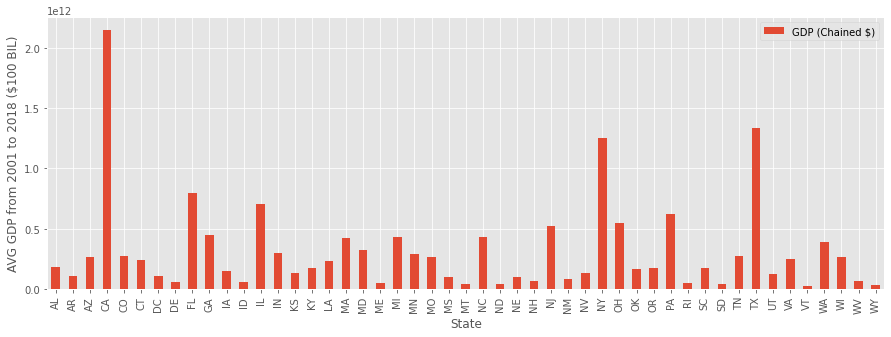

In [8]:
grouped.plot(figsize=(15,5),kind='bar',x='STATE_ABBR',y='GDP (Chained $)')
plt.xlabel('State')
plt.ylabel('AVG GDP from 2001 to 2018 ($100 BIL)')
plt.show()

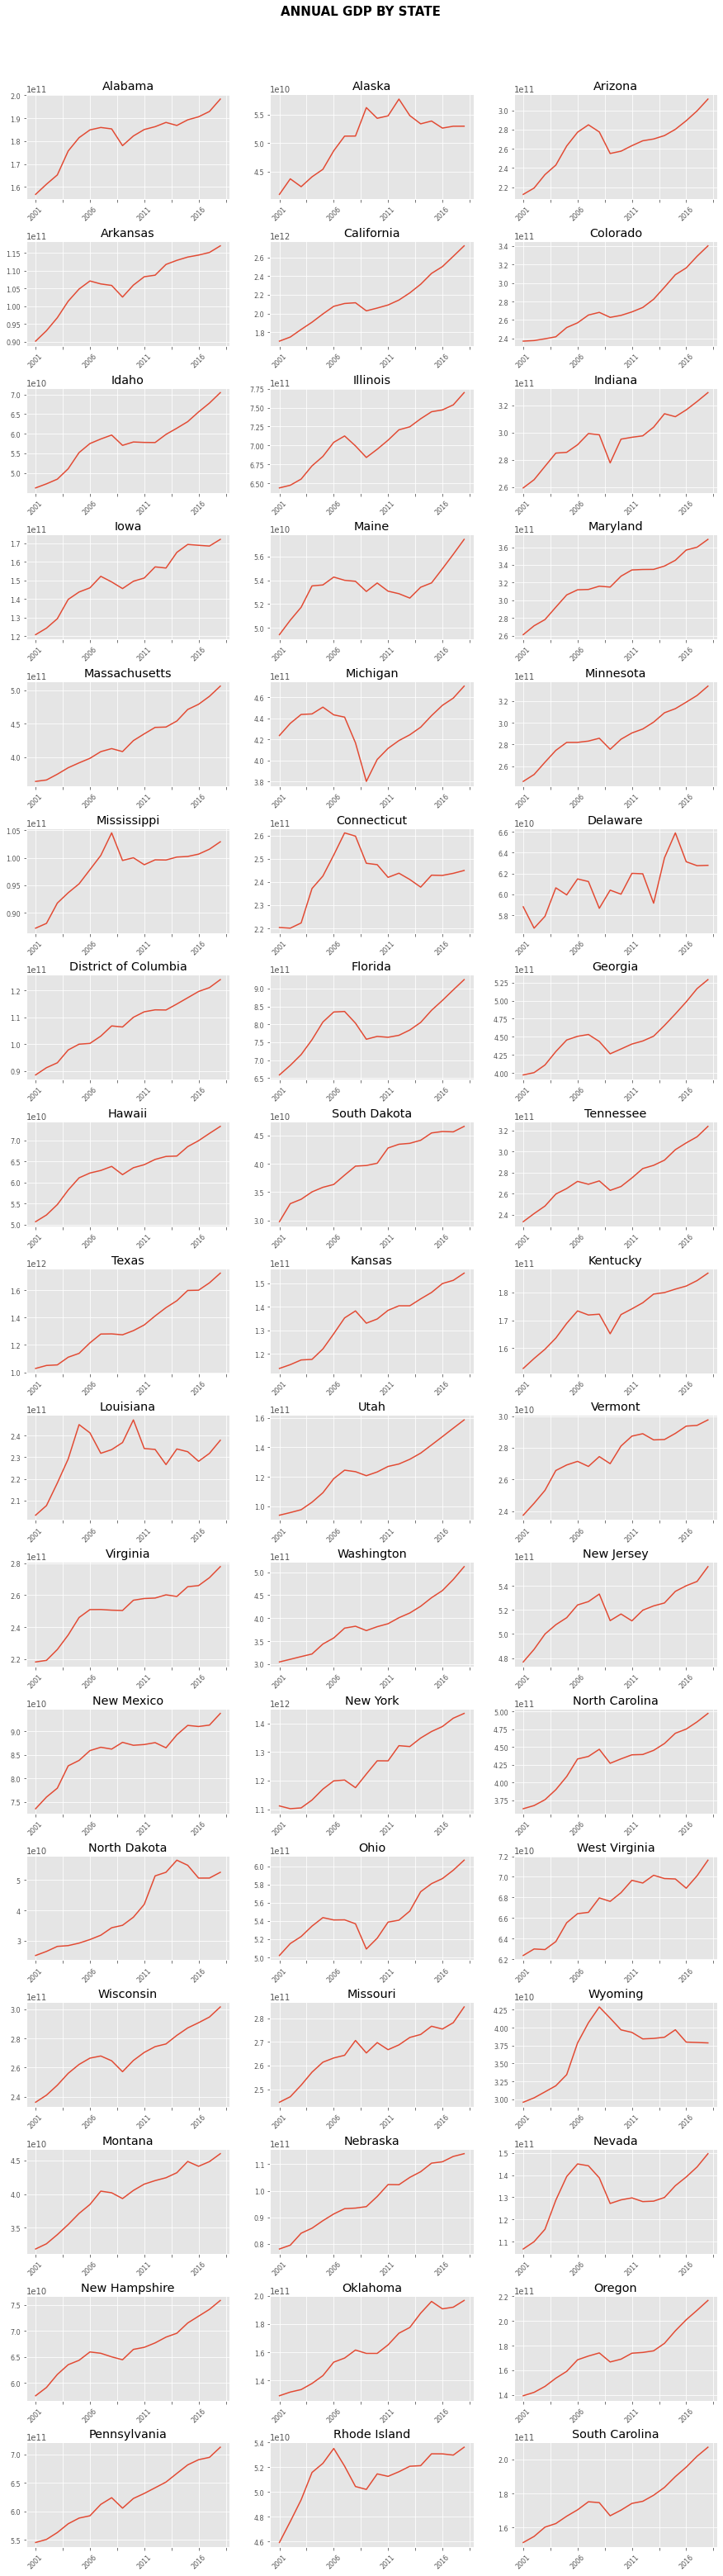

In [9]:
States=df['State'].unique()
fig,axes=plt.subplots(17,3,figsize=(15,50))

for state,ax in zip(States,axes.ravel()):
    filtered=df.query('State==@state').sort_values('Year')
    grouped=filtered.groupby('Year')['GDP (Chained $)'].sum().reset_index()
    grouped.plot(ax=ax,x='Year',y='GDP (Chained $)',legend=False,xlabel='',rot=45,fontsize=8)
    ax.set_title(state)
plt.subplots_adjust(hspace=0.4,top=0.95)
plt.suptitle('ANNUAL GDP BY STATE',size=15,fontweight='bold')
plt.show()

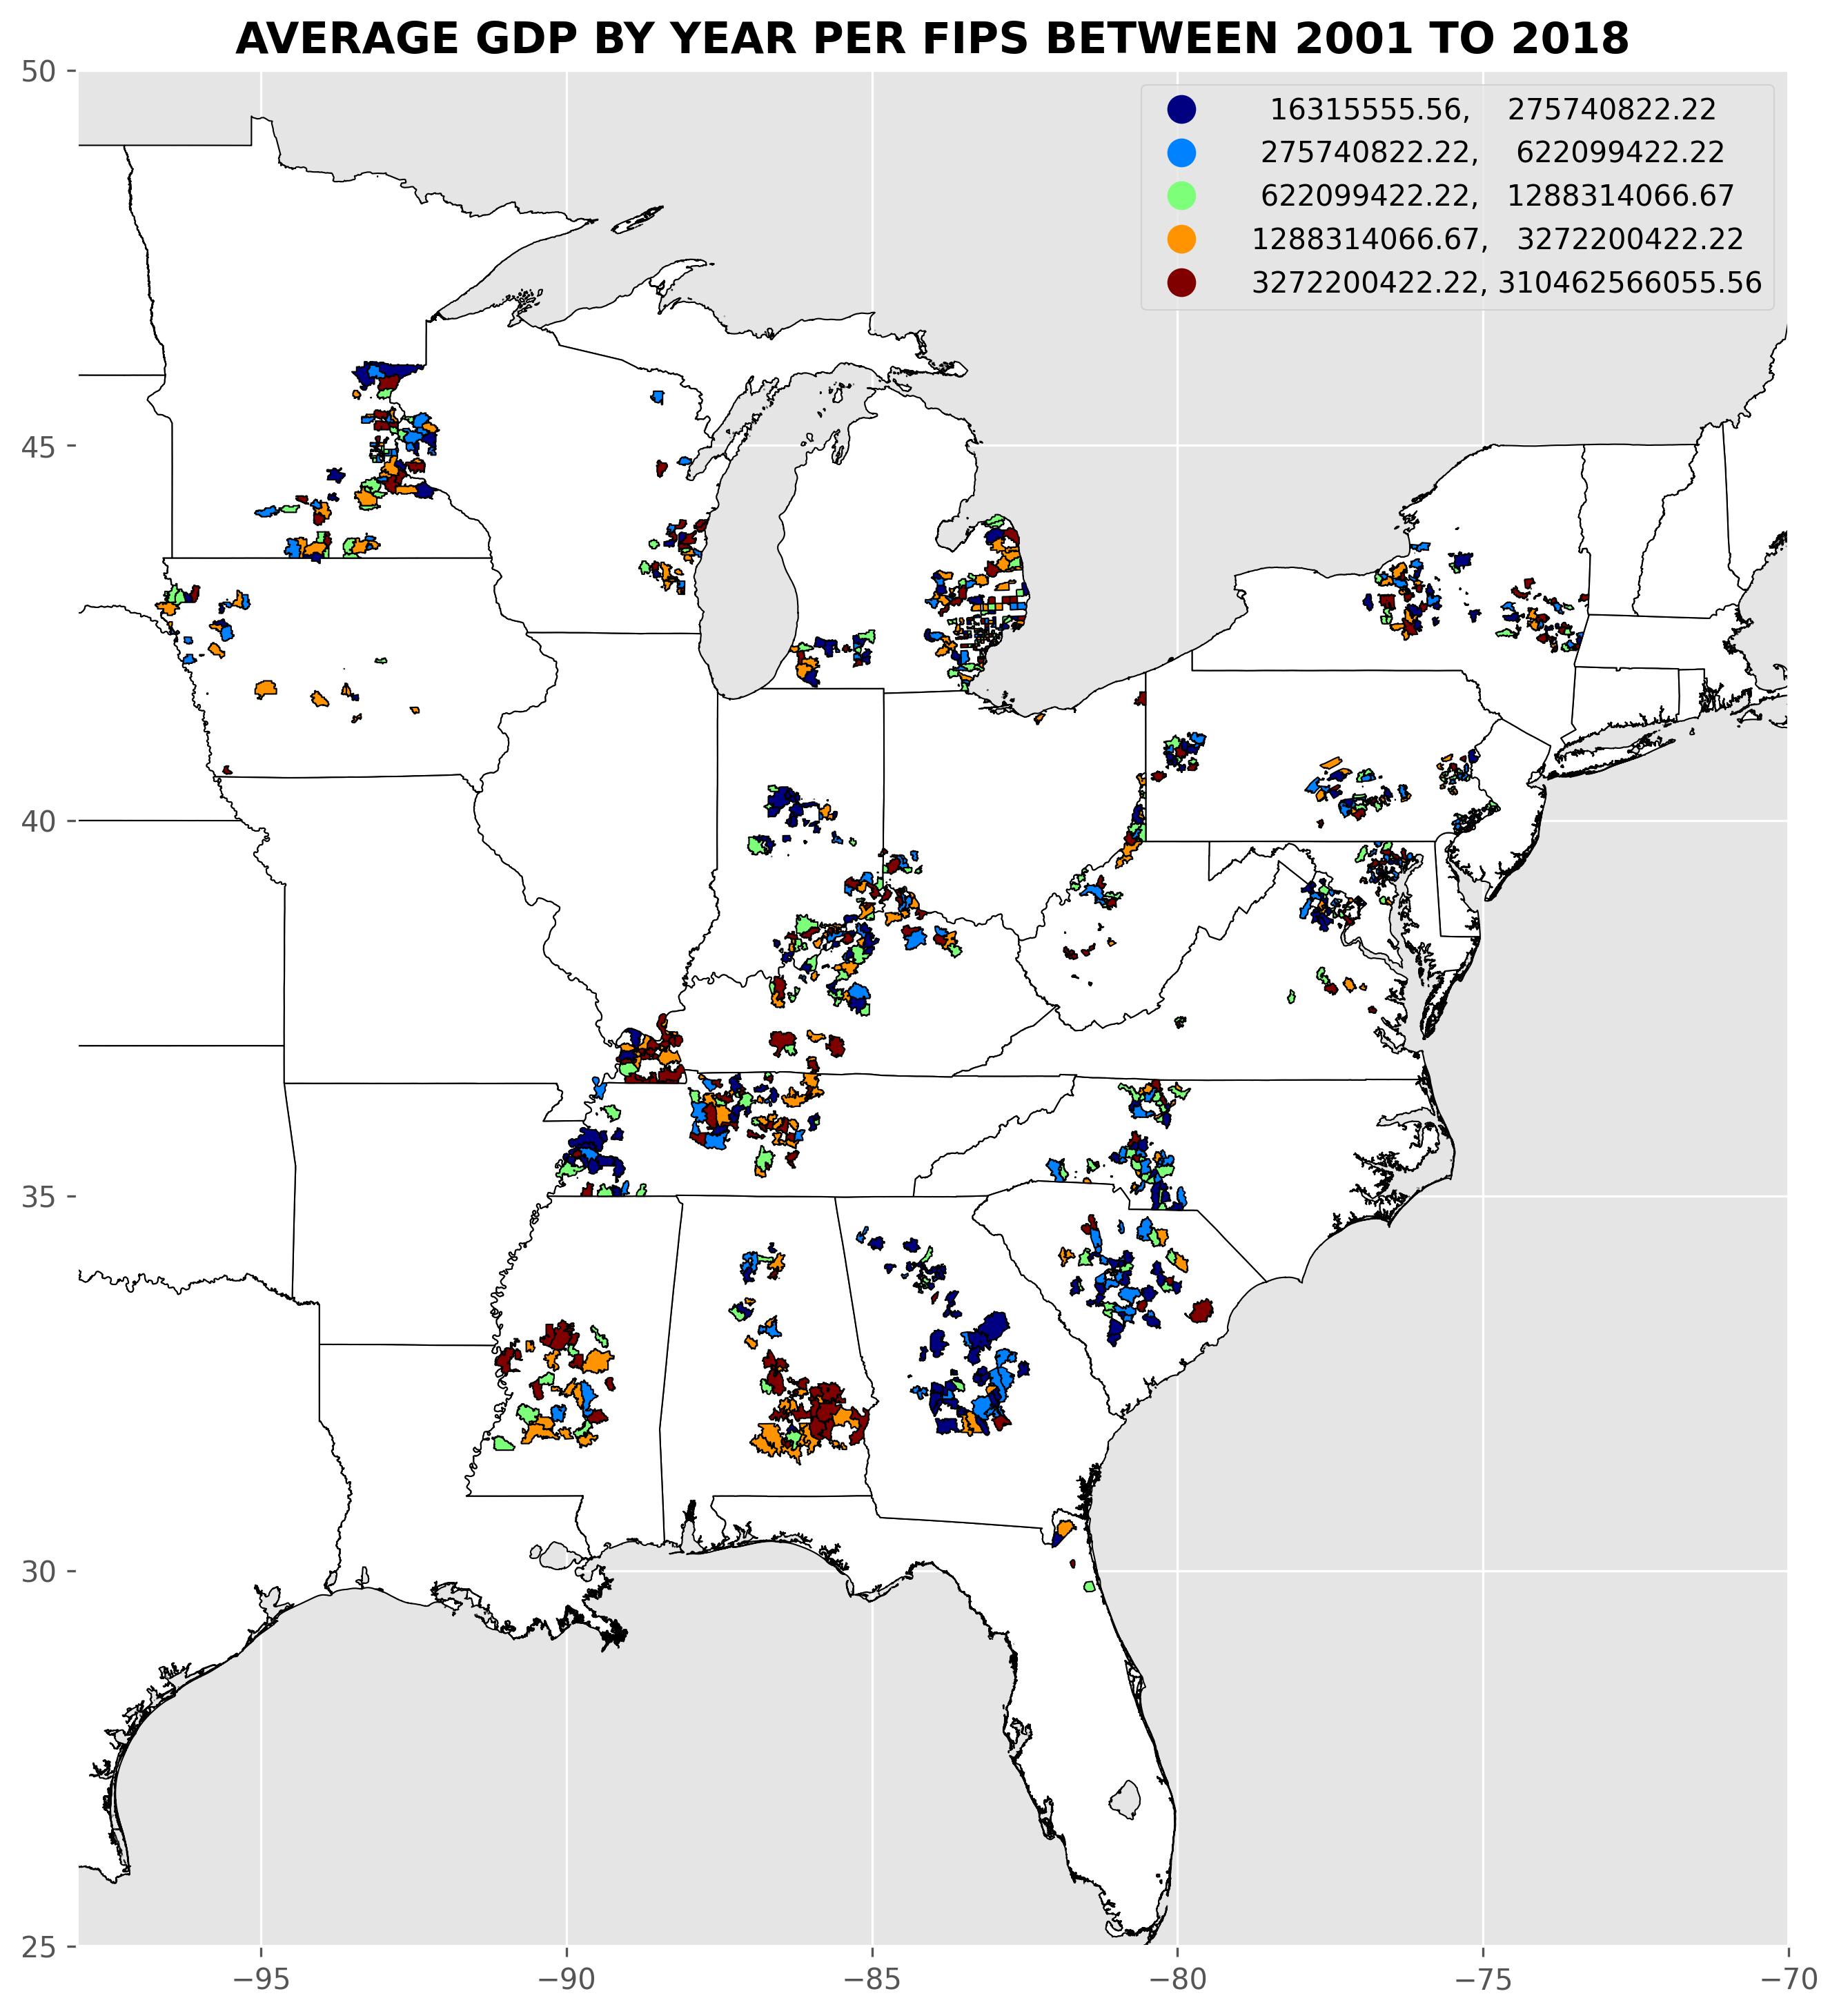

In [10]:
grouped=df.groupby(['Year','County FIPS'])['GDP (Chained $)'].sum().reset_index()\
.groupby('County FIPS')['GDP (Chained $)'].mean().reset_index()
grouped=grouped.merge(zips[['GEOID10','geometry']],left_on='County FIPS',right_on='GEOID10')
grouped=geopandas.GeoDataFrame(grouped)

fig,ax=plt.subplots(1,1,figsize=(15,12),dpi=300)
states.plot(ax=ax,color='white',ec='black')
grouped.plot(ax=ax,column='GDP (Chained $)',cmap='jet',ec='k',scheme='quantiles',legend=True)
plt.title('AVERAGE GDP BY YEAR PER FIPS BETWEEN 2001 TO 2018',size=15,fontweight='bold')
plt.xlim(-98,-70)
plt.ylim(25,50)
plt.show()